# Investigating Internet, Patents, and Population on the World Scale.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A vast amount of data has been organized by country and year for metrics related to the economy, education, environment, health, and more. Some of the data sets span hundreds of years.

> Note: Data for this report is in the public domain at https://www.gapminder.org/data/.

From the website download the three files shown below as XLSX, open in spreadsheet software and save as CSV with utf-8 encoding.

<ul>
<li>Internet user per 100.xlsx</li>
<li>indicator Patent grants.xlsx</li>
<li>indicator gapminder population.xlsx</li>
</ul>

#### Install Anaconda and open terminal.

` ~ $ conda create -n proj3 # create a new environment to isolate project dependencies`

`~ $ source activate proj3 # enter environment`

`~ $ conda install python=3 numpy pandas matplotlib seaborn # install required packages`

`~ $ conda env export > environment.yaml # write project dependencies to conda specific file`

`~ $ pip freeze > requirements.txt # write project dependencies to generic file`

In [1]:
# import packages to environment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# "magic" keyword creates plots inline with this jupyter notebook
% matplotlib inline

In [3]:
# display format of floats in dataframe presentations
pd.options.display.float_format = '{:,.0f}'.format

### Analysis Questions

These questions below follow a common theme. Does access to information (internet) increase creativity (patents granted) on a worldwide scale? These data set are uniquely capable of investigating this idea.

#### 1. How has internet access changed in the world over time?
#### 2. What countries produced the most patents between 1990 - 2001?
#### 3. What countries produced the most patents _per capita_ between 1990 - 2001?
#### 4. For the countries identified in Question 3, what is the Person's R correlation between internet access and patents granted?

<a id='wrangling'></a>
## Data Wrangling

#### General Properties

In [4]:
# import csv files and assign to pandas DataFrame objects
df_int = pd.read_csv('internet.csv', index_col = 0)
df_pat = pd.read_csv('patents.csv', index_col = 0)
df_pop = pd.read_csv('population.csv', index_col = 0)

> Note: The units are important. The internet data has units of "internet users per 100 people"; the patent and population data are simply "total occurrences"

In [5]:
# check the conversion of csv to dataframe
df_int.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Abkhazia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Afghanistan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,1,2,2,2,3,4,5
Akrotiri and Dhekelia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Albania,0,nan,nan,nan,nan,0,0,0,0,0,...,0,1,2,6,10,15,24,41,45,49
Algeria,0,nan,nan,nan,0,0,0,0,0,0,...,2,2,5,6,7,9,10,11,12,14


In [6]:
# check the conversion of csv to dataframe
df_pat.head()

,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,Unnamed: 20
Albania,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,52,203,502,nan,nan
Algeria,nan,nan,nan,nan,nan,nan,592,617,83,nan,nan,118,nan,863,nan,nan,nan,nan,111,nan
Argentina,"1,677",nan,598,"2,575","1,815",nan,nan,406,663,"3,479","2,130","1,004","1,792","1,228","1,689","1,241","1,587",nan,nan,nan
Armenia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,127,143,85,205,168,185,151,nan
Aruba,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan


In [7]:
# check the conversion of csv to dataframe
df_pop.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
Abkhazia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Afghanistan,"3,280,000","3,280,000","3,323,519","3,448,982","3,625,022","3,810,047","3,973,968","4,169,690","4,419,695","4,710,171",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Akrotiri and Dhekelia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Albania,"410,445","423,591","438,671","457,234","478,227","506,889","552,800","610,036","672,544","741,688",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Algeria,"2,503,218","2,595,056","2,713,079","2,880,355","3,082,721","3,299,305","3,536,468","3,811,028","4,143,163","4,525,691",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


By inspection, there are many NULL (nan) values in all three data sets; the rows contain different countries in different orders; the columns contain different years with different spacing; there are unnamed columns in the patent and population dataframes.

### Data Cleaning

#### Find and remove duplicates

In [8]:
# total number of duplicate rows in each df
print(df_int.duplicated().sum(), 'duplicate rows in internet dataframe.', )
print(df_pat.duplicated().sum(), 'duplicate rows in patent dataframe.')
print(df_pop.duplicated().sum(), 'duplicate rows in population dataframe.')

69 duplicate rows in internet dataframe.
0 duplicate rows in patent dataframe.
742 duplicate rows in population dataframe.


In [9]:
# remove duplicate rows
df_int.drop_duplicates(inplace = True)
df_pat.drop_duplicates(inplace = True)
df_pop.drop_duplicates(inplace = True)

In [10]:
# total number of duplicate rows in each df
print(df_int.duplicated().sum(), 'duplicate rows in internet dataframe.', )
print(df_pat.duplicated().sum(), 'duplicate rows in patent dataframe.')
print(df_pop.duplicated().sum(), 'duplicate rows in population dataframe.')

0 duplicate rows in internet dataframe.
0 duplicate rows in patent dataframe.
0 duplicate rows in population dataframe.


#### Trim unnamed columns

In [11]:
# brief summary of dataframe
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, Abkhazia to Zimbabwe
Data columns (total 22 columns):
1990    203 non-null float64
1991    39 non-null float64
1992    50 non-null float64
1993    64 non-null float64
1994    90 non-null float64
1995    138 non-null float64
1996    171 non-null float64
1997    180 non-null float64
1998    186 non-null float64
1999    193 non-null float64
2000    195 non-null float64
2001    196 non-null float64
2002    198 non-null float64
2003    193 non-null float64
2004    196 non-null float64
2005    198 non-null float64
2006    198 non-null float64
2007    200 non-null float64
2008    203 non-null float64
2009    201 non-null float64
2010    194 non-null float64
2011    187 non-null float64
dtypes: float64(22)
memory usage: 37.0+ KB


The internet dataframe is acceptable.

In [12]:
# brief summary of dataframe
df_pat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, Albania to nan
Data columns (total 20 columns):
1984           88 non-null float64
1985           89 non-null float64
1986           84 non-null float64
1987           79 non-null float64
1988           85 non-null float64
1989           85 non-null float64
1990           86 non-null float64
1991           84 non-null float64
1992           92 non-null float64
1993           96 non-null float64
1994           97 non-null float64
1995           104 non-null float64
1996           103 non-null float64
1997           87 non-null float64
1998           83 non-null float64
1999           98 non-null float64
2000           91 non-null float64
2001           80 non-null float64
2002           68 non-null float64
Unnamed: 20    0 non-null float64
dtypes: float64(20)
memory usage: 24.4+ KB


The last column in the patent dataframe is unnamed and full of NULL values. This is an artifact of the conversion from XLSX > CSV > pandas DataFrame. This column can be removed entirely.

In [13]:
# remove the last column
df_pat = df_pat.iloc[:,:-1]

In [14]:
# brief summary of dataframe
df_pat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, Albania to nan
Data columns (total 19 columns):
1984    88 non-null float64
1985    89 non-null float64
1986    84 non-null float64
1987    79 non-null float64
1988    85 non-null float64
1989    85 non-null float64
1990    86 non-null float64
1991    84 non-null float64
1992    92 non-null float64
1993    96 non-null float64
1994    97 non-null float64
1995    104 non-null float64
1996    103 non-null float64
1997    87 non-null float64
1998    83 non-null float64
1999    98 non-null float64
2000    91 non-null float64
2001    80 non-null float64
2002    68 non-null float64
dtypes: float64(19)
memory usage: 23.3+ KB


The patent dataframe is now prepared for analysis.

In [15]:
# brief summary of dataframe
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, Abkhazia to Sint Maarten (Dutch part)
Data columns (total 91 columns):
1800           229 non-null float64
1810           229 non-null float64
1820           229 non-null float64
1830           229 non-null float64
1840           229 non-null float64
1850           229 non-null float64
1860           229 non-null float64
1870           229 non-null float64
1880           229 non-null float64
1890           229 non-null float64
1900           229 non-null float64
1910           229 non-null float64
1920           229 non-null float64
1930           229 non-null float64
1940           229 non-null float64
1950           256 non-null float64
1951           256 non-null float64
1952           256 non-null float64
1953           256 non-null float64
1954           256 non-null float64
1955           256 non-null float64
1956           256 non-null float64
1957           256 non-null float64
1958           256 non-null float64
1959   

The population data set has a similar problem as the patent data, the last 10 columns are artifacts of the raw data conversion, they are completely NULL and can be removed.

In [16]:
# remove the last 10 columns
df_pop = df_pop.iloc[:,:-10]

In [17]:
# brief summary of dataframe
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, Abkhazia to Sint Maarten (Dutch part)
Data columns (total 81 columns):
1800    229 non-null float64
1810    229 non-null float64
1820    229 non-null float64
1830    229 non-null float64
1840    229 non-null float64
1850    229 non-null float64
1860    229 non-null float64
1870    229 non-null float64
1880    229 non-null float64
1890    229 non-null float64
1900    229 non-null float64
1910    229 non-null float64
1920    229 non-null float64
1930    229 non-null float64
1940    229 non-null float64
1950    256 non-null float64
1951    256 non-null float64
1952    256 non-null float64
1953    256 non-null float64
1954    256 non-null float64
1955    256 non-null float64
1956    256 non-null float64
1957    256 non-null float64
1958    256 non-null float64
1959    256 non-null float64
1960    256 non-null float64
1961    256 non-null float64
1962    256 non-null float64
1963    256 non-null float64
1964    256 non-null float64
1

The population dataframe is ready for analysis.

### Handling NULL values

The dataframes have been cleaned and trimmed for analysis. However, the question remains of how to handle the NULL values _within_ the tables themselves. One approach is to fill these cells with zero. In this case that does not makes sense: there were not zero people using the internet in an entire country if the data on a specific year is missing. Another approach is to impute the NULL values with a mean or some other derived value. This skews the data in unknown ways, albeit a more realistic skew than a simple zero. The author chooses to leave the NULL values as NULL, the data is missing and it will remain missing in the analysis. This seems the most reasonable choice given the alternatives.

### Overlapping data for Multiple-Variable (2D) Exploration

The three data sets overlap one another on the years 1990 - 2001. These are the common columns. A shared set of country names must also be determined.

In [18]:
# truncate the data sets on the common columns
df_int_overlap = df_int.loc[:, '1990':'2001']
df_pat_overlap = df_pat.loc[:, '1990':'2001']
df_pop_overlap = df_pop.loc[:, '1990':'2001']

The columns are identical, a common set of row indices are needed.

> Note: The author recognizes that the following code is likely not the most elegant solution, suggestions for improvements are welcome!

In [19]:
# create a mask for the internet data based on a common index list
index_mask = pd.Series()
for index in df_int_overlap.index:
    if index in df_pat_overlap.index:
        index_mask[index] = True
    else:
        index_mask[index] = False

In [20]:
# apply mask to remove indicies that are not common between dataframes
df_int_overlap = df_int_overlap[index_mask]

In [21]:
# create a mask for the internet data based on a common index list
index_mask = pd.Series()
for index in df_pop_overlap.index:
    if index in df_int_overlap.index:
        index_mask[index] = True
    else:
        index_mask[index] = False

In [22]:
# apply mask to remove indicies that are not common between dataframes
df_pop_overlap = df_pop_overlap[index_mask]

In [23]:
# create a mask for the internet data based on a common index list
index_mask = pd.Series()
for index in df_pat_overlap.index:
    if index in df_pop_overlap.index:
        index_mask[index] = True
    else:
        index_mask[index] = False

In [24]:
# apply mask to remove indicies that are not common between dataframes
df_pat_overlap = df_pat_overlap[index_mask]

In [25]:
# print dimensions of dataframes
print(df_int_overlap.shape, 'is the shape of the OVERLAP internet data.')
print(df_pat_overlap.shape, 'is the shape of the OVERLAP patent data.')
print(df_pop_overlap.shape, 'is the shape of the OVERLAP population data.')

(135, 12) is the shape of the OVERLAP internet data.
(135, 12) is the shape of the OVERLAP patent data.
(135, 12) is the shape of the OVERLAP population data.


All three "overlap" dataframes have the exact same countries (row indices) and years (columns indices). These dataframes can now be easily compared to one another.

### Normalized patent data

The internet data has the units "internet users per 100 people", while the patent and population data are "total occurrences". Dividing the patent data by the population data (and multiplying by 100) will create a dataframe with units "patents granted per 100 people". This normalized patent dataframe can then be compared directly to the internet data since they share common units of "... per 100 people".

In [26]:
# patents per 100 people
# true_divide uses element-wise division, not matrix division
df_pat_normalized = np.true_divide(df_pat_overlap, df_pop_overlap)*100

In [27]:
# print dimensions of dataframes
print(df_pat_normalized.shape, 'is the shape of the NORMALIZED patent per 100 people data.')

(135, 12) is the shape of the NORMALIZED patent per 100 people data.


<a id='eda'></a>
## Exploratory Data Analysis

#### 1. How has the world's internet access increased over time?

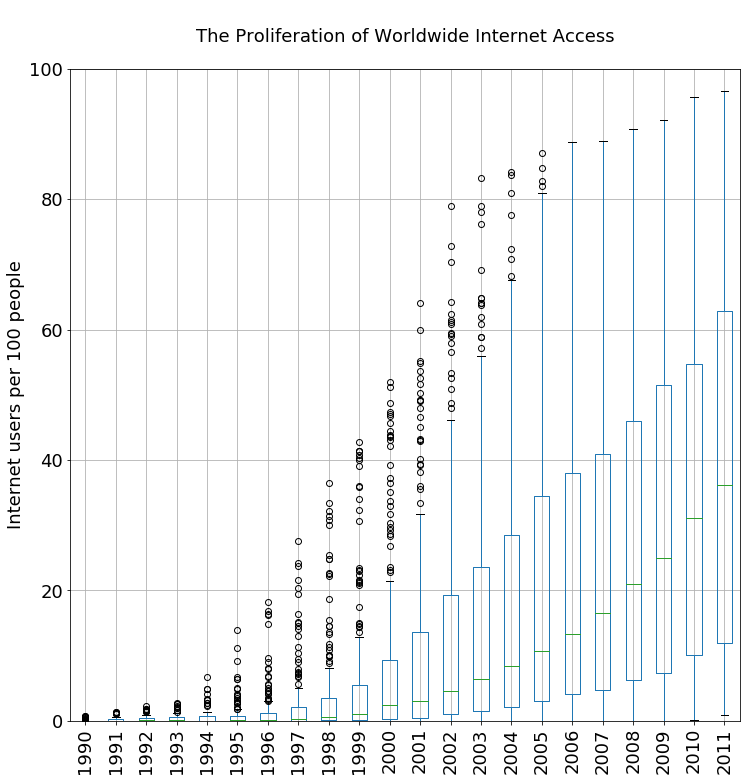

In [28]:
ax = df_int.boxplot(figsize = (12,12), return_type = 'axes', rot=90);
ax.set_ylim(0, 100);
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Internet users per 100 people', size=18)
plt.title('\nThe Proliferation of Worldwide Internet Access\n', size=18);

This plot shows the proliferation of internet access worldwide. The distribution is clearly increasing with time in a non-linear fashion. The steady reduction of outliers each year between 2000 and 2006 indicates that the distribution of internet users worldwide is coalescing around a mean value. The data spread (disparity between the minimum and maximum) is decreasing. This democratization of knowledge is a critical catalyst to the progress of humanity.

#### 2. What countries produced the most patents between 1990 - 2001?

In [29]:
# display a table of countries with the patents
tot_pats = df_pat_overlap.sum(axis=1)
largest_3 = tot_pats.nlargest(3)
max_country = tot_pats.idxmax(axis=1)
largest_3 = largest_3.to_frame()
largest_3.columns=['Total Patents']
largest_3.astype('float64')

,Total Patents
United States,"1,431,933"
Japan,"1,369,416"
Germany,"557,676"


The United States produced the most patents with Japan as a close second. As discussed, the sheer volume of patents is not a fair metric for comparison. To gauge a country's creativity the number of patents must be normalized against the population.

#### 3. What countries produced the most patents _per capita_ between 1990 - 2001?

In [30]:
# display a table of countries with the patents
tot_pats = df_pat_normalized.sum(axis=1)
largest_3 = tot_pats.nlargest(3)
max_country = tot_pats.idxmax(axis=1)
largest_3 = largest_3.to_frame()
largest_3.columns=['Patents per 100 People']
largest_3.astype('float64')

,Patents per 100 People
Japan,31
Luxembourg,26
Sweden,23


Japan has the most inventive culture with a total of 31 patents per 100 people when considering the eleven year period of the data set. Luxembourg and Sweden also have very creative societies.

#### 4. For the countries identified in Question 3, what is the Person's R correlation between internet access and patents granted?

Build the x and y coordinates for a scatterplot of each country.

In [31]:
# x-coordinates
x_Japan = df_pat_normalized.loc['Japan', :]
x_Luxembourg = df_pat_normalized.loc['Luxembourg', :]
x_Sweden = df_pat_normalized.loc['Sweden', :]

# y-coordinates
y_Japan = df_int_overlap.loc['Japan', :]
y_Luxembourg = df_int_overlap.loc['Luxembourg', :]
y_Sweden = df_int_overlap.loc['Sweden', :]

Calculate Pearson's R for each country.

In [32]:
# Japan correlation
df_Japan = pd.concat([x_Japan, y_Japan], axis=1)
df_Japan.columns = ['patents', 'internet']
df_Japan['Country'] = 'Japan'
Pearsons_Japan = df_Japan['internet'].corr(df_Japan['patents'])

# Luxembourg correlation
df_Luxembourg = pd.concat([x_Luxembourg, y_Luxembourg], axis=1)
df_Luxembourg.columns = ['patents', 'internet']
df_Luxembourg['Country'] = 'Luxembourg'
Pearsons_Luxembourg = df_Luxembourg['internet'].corr(df_Luxembourg['patents'])

# Sweden correlation
df_Sweden = pd.concat([x_Sweden, y_Sweden], axis=1)
df_Sweden.columns = ['patents', 'internet']
df_Sweden['Country'] = 'Sweden'
Pearsons_Sweden = df_Sweden['internet'].corr(df_Sweden['patents'])

In [33]:
# display summary table
df_Pearsons = pd.DataFrame(
    data=[Pearsons_Japan, Pearsons_Luxembourg, Pearsons_Sweden],
    index=['Japan', 'Luxembourg', 'Sweden'], columns=["Pearson's R"])
pd.options.display.float_format = '{:,.1f}'.format
df_Pearsons

,Pearson's R
Japan,0.2
Luxembourg,-0.7
Sweden,-0.8


Put the data for all three countries into a single dataframe. This will allow all three countries to be examined on the same plot.

In [34]:
# concatentate results for plotting
frames = [df_Japan, df_Luxembourg, df_Sweden]
frames = pd.concat(frames)

Generate plot using seaborn library and matplotlib customization.

C:\ProgramData\Anaconda3\envs\proj3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


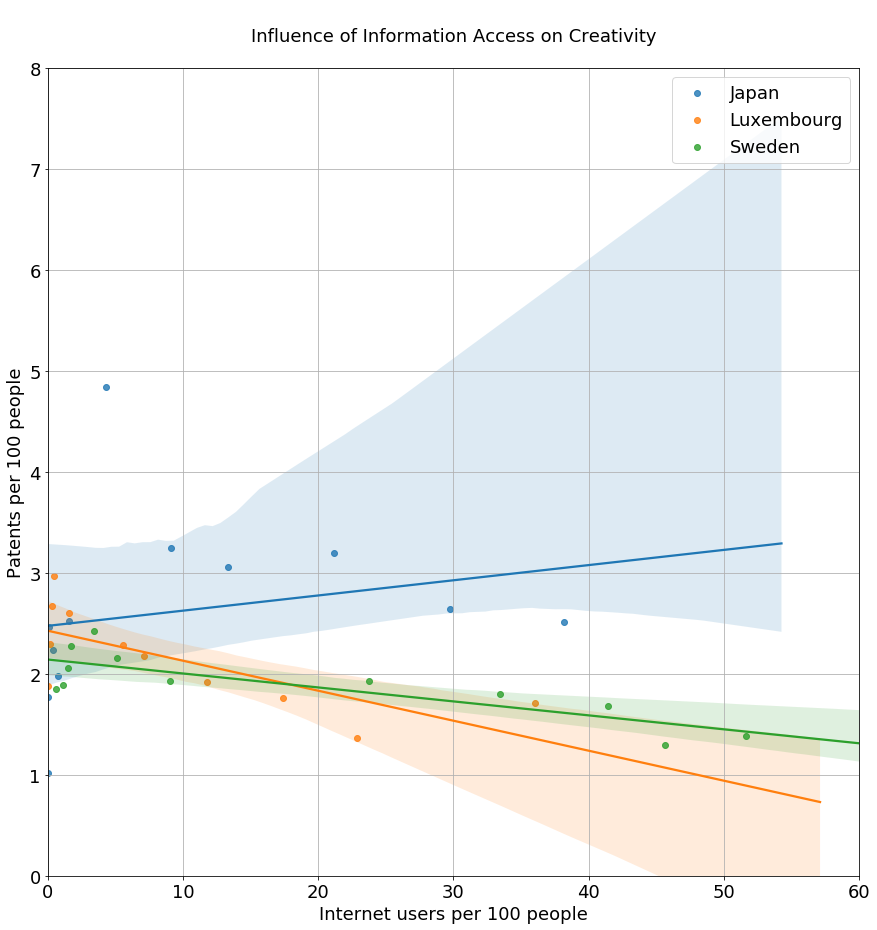

In [35]:
# run seaborn plot
ax = sns.lmplot(x='internet', y='patents', data=frames, height=12, hue='Country', legend=False)
plt.grid(axis='both')
plt.title('\nInfluence of Information Access on Creativity\n', size=18);
plt.xlabel('Internet users per 100 people', size=18)
plt.ylabel('Patents per 100 people', size=18)
plt.xlim(0,60)
plt.ylim(0,8)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=18);
sns.despine(top=False, right=False)

This is a rather surprising result. For the most "creative" countries, access to the internet has decreased the number of patents per capita. Japan has essentially no correlation (R = 0.2) while Luxembourg (R = -0.7) and Sweden (R = -0.8) have negative correlations.

<a id='conclusions'></a>
## Conclusions

A simple question was posed in this discussion: Does access to information (internet) increase creativity (patents granted) on a worldwide scale? For the countries with the most patents per capita (the most creative) between the years 1990 and 2001, the answer is no. This does not imply causation, it is only an observation of the data under discussion and not a definitive statement. The number of patents granted in any given country has a multitude of influencing factors, of which internet access may be a less dominant indicator.

As a process summary: data was taken in raw XLSX form and converted to utf-8 CSV, then imported as pandas dataframes, duplicate rows removed, and excess columns trimmed. A common set of row indices and column indices was obtained using Python logic so that direct comparisons were possible. As a final step of multivariable analysis, the patent data was normalized with the country population to arrive at a unit system that was consistent with the raw internet data. Summary statistics, along with a comprehensive boxplot and scatterplot regression were considered.